Analysis on F002


Preview of the dataset:
   0   1        2       3      4       5       6        7        8     9   \
0   1   1  34.9983  0.8400  100.0  449.44  555.32  1358.61  1137.23  5.48   
1   1   2  41.9982  0.8408  100.0  445.00  549.90  1353.22  1125.78  3.91   
2   1   3  24.9988  0.6218   60.0  462.54  537.31  1256.76  1047.45  7.05   
3   1   4  42.0077  0.8416  100.0  445.00  549.51  1354.03  1126.38  3.91   
4   1   5  25.0005  0.6203   60.0  462.54  537.07  1257.71  1047.93  7.05   

   ...      16       17       18       19    20   21    22      23     24  \
0  ...  183.06  2387.72  8048.56   9.3461  0.02  334  2223  100.00  14.73   
1  ...  130.42  2387.66  8072.30   9.3774  0.02  330  2212  100.00  10.41   
2  ...  164.22  2028.03  7864.87  10.8941  0.02  309  1915   84.93  14.08   
3  ...  130.72  2387.61  8068.66   9.3528  0.02  329  2212  100.00  10.59   
4  ...  164.31  2028.00  7861.23  10.8963  0.02  309  1915   84.93  14.13   

       25  
0  8.8071  
1  6.2665  
2  8.6723  
3 

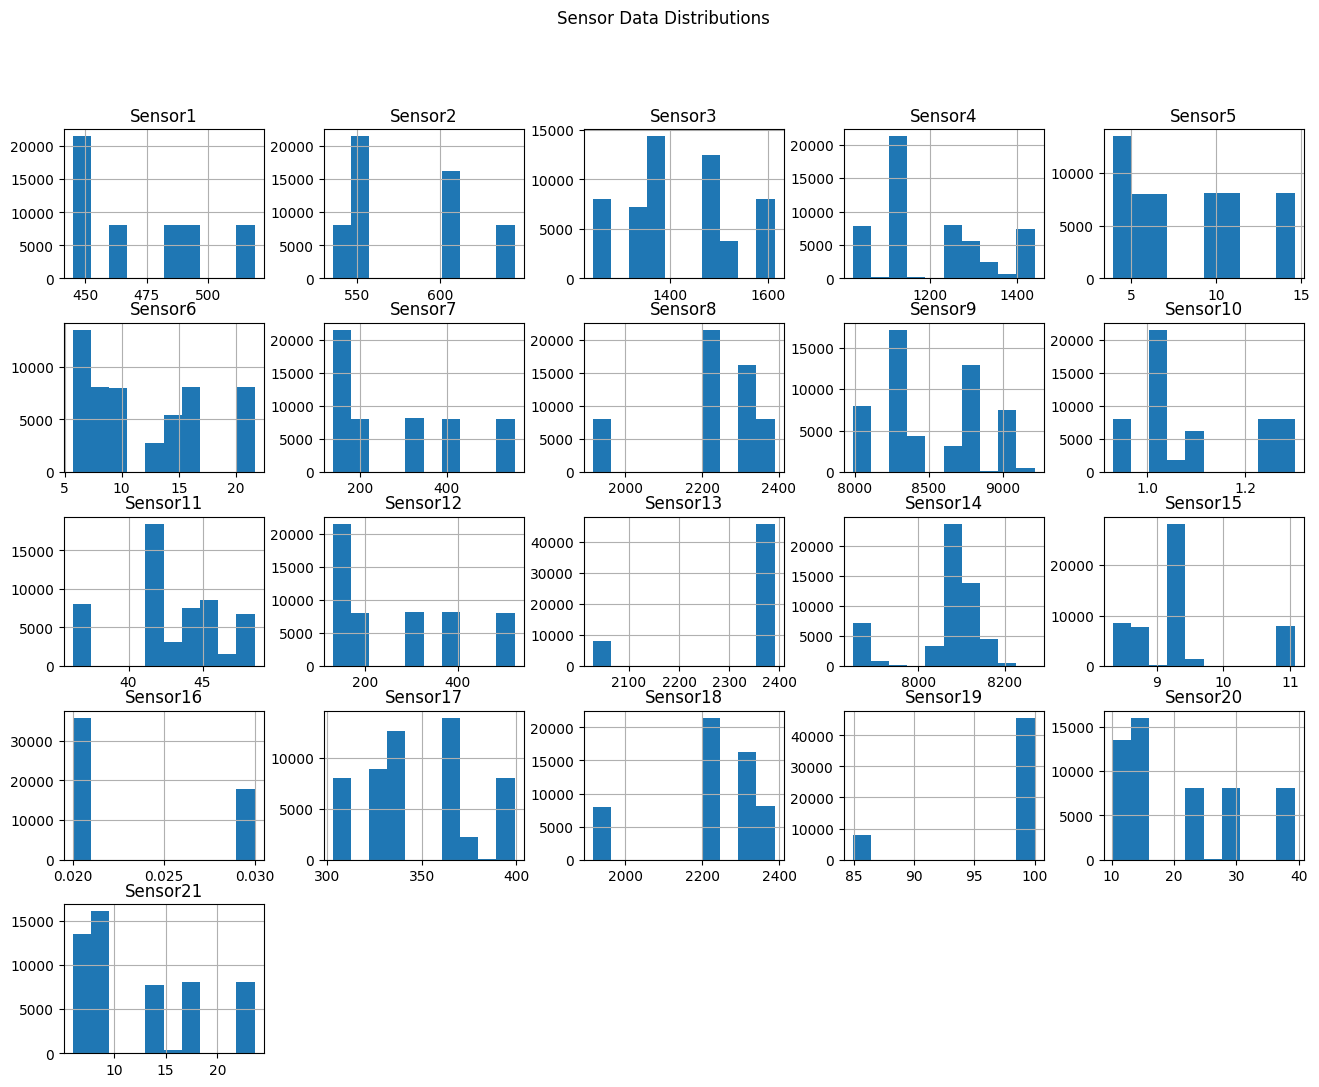

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load new dataset (replace with your new file path)
new_dataset_path = '/content/train_FD002.txt'

# Load the dataset and inspect the first few rows
new_data = pd.read_csv(new_dataset_path, sep=" ", header=None)
new_data.dropna(axis=1, inplace=True)  # Clean up any extra columns
print("Preview of the dataset:")
print(new_data.head())

# Determine column names dynamically
# Assuming the first few columns are Engine ID, Cycle, and Operational Settings
num_columns = new_data.shape[1]
if num_columns == 26:  # Same structure as previous
    new_data.columns = ['Engine ID', 'Cycle', 'OpSetting1', 'OpSetting2', 'OpSetting3'] + [f'Sensor{i}' for i in range(1, 22)]
elif num_columns > 26:  # Extra columns present
    new_data.columns = ['Engine ID', 'Cycle', 'OpSetting1', 'OpSetting2', 'OpSetting3'] + [f'Sensor{i}' for i in range(1, 22)] + [f'ExtraCol{i}' for i in range(1, num_columns - 26 + 1)]
else:  # Fewer columns
    print(f"Dataset has fewer columns ({num_columns}). Adjusting column names...")
    num_sensors = num_columns - 3  # Deduct Engine ID, Cycle, and 1 Operational Setting
    new_data.columns = ['Engine ID', 'Cycle', 'OpSetting1'] + [f'Sensor{i}' for i in range(1, num_sensors + 1)]

# Descriptive statistics
print("Descriptive Statistics:")
print(new_data.describe())

# Plot histograms for sensors
sensor_columns = [col for col in new_data.columns if 'Sensor' in col]
if sensor_columns:
    new_data[sensor_columns].hist(figsize=(16, 12))
    plt.suptitle('Sensor Data Distributions')
    plt.show()
else:
    print("No sensor data columns detected for histogram plotting.")


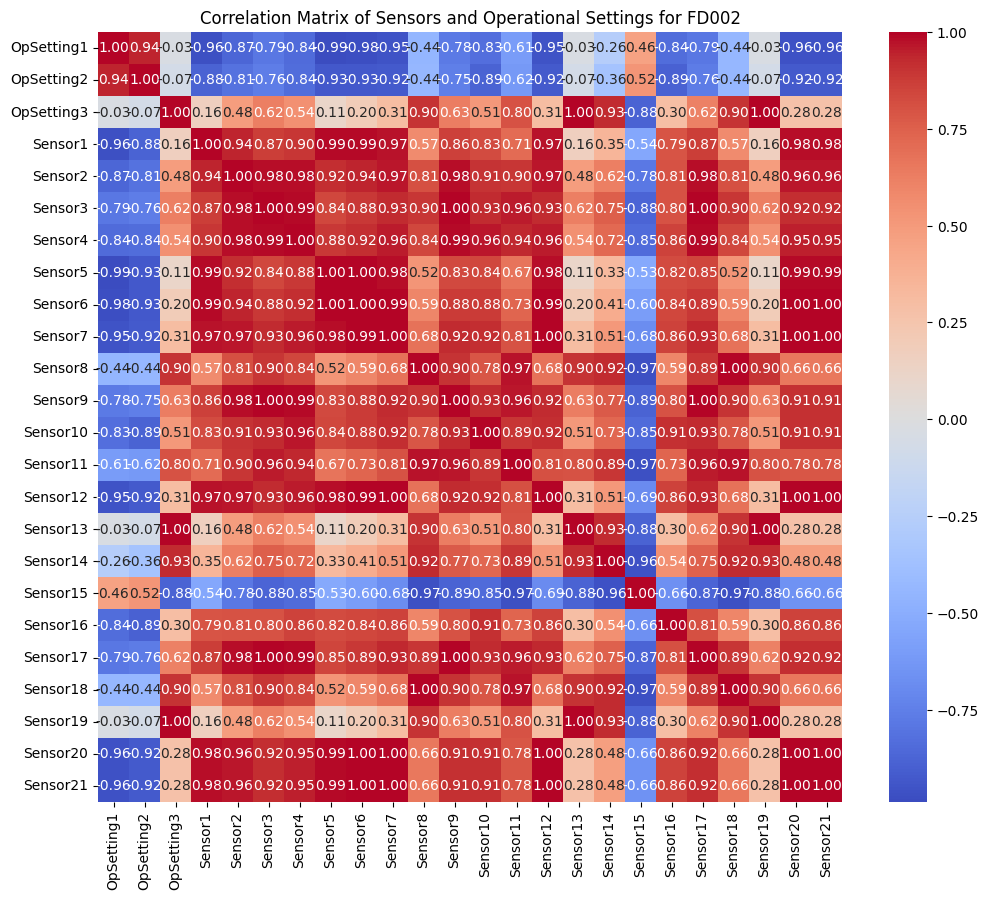

Correlation of features with RUL:
RUL           1.000000
Sensor20      0.006287
Sensor21      0.006165
Sensor19      0.005761
OpSetting3    0.005761
Sensor13      0.005245
Sensor18      0.004780
Sensor8       0.004345
Sensor10      0.004306
Sensor7       0.002430
Sensor12      0.002249
OpSetting1    0.001135
OpSetting2    0.000047
Sensor1      -0.000023
Sensor6      -0.000496
Sensor5      -0.000758
Sensor2      -0.004928
Sensor9      -0.015306
Sensor3      -0.026942
Sensor17     -0.027031
Sensor15     -0.038455
Sensor4      -0.040978
Sensor14     -0.042325
Sensor11     -0.046950
Sensor16     -0.071352
Name: RUL, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load FD002 dataset
train_fd002 = pd.read_csv('/content/train_FD002.txt', sep=" ", header=None)
train_fd002.dropna(axis=1, inplace=True)  # Remove extra columns
train_fd002.columns = ['Engine ID', 'Cycle', 'OpSetting1', 'OpSetting2', 'OpSetting3'] + [f'Sensor{i}' for i in range(1, 22)]

# Standardize data (exclude Engine ID and Cycle)
numeric_columns = train_fd002.columns[2:]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_fd002[numeric_columns])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# Calculate and plot the correlation matrix
correlation_matrix = scaled_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Sensors and Operational Settings for FD002')
plt.show()

# Add RUL column
train_fd002['Max Cycle'] = train_fd002.groupby('Engine ID')['Cycle'].transform('max')
train_fd002['RUL'] = train_fd002['Max Cycle'] - train_fd002['Cycle']
train_fd002.drop(columns=['Max Cycle'], inplace=True)

# Correlation with RUL
correlations_with_rul = scaled_df.join(train_fd002['RUL']).corr()['RUL'].sort_values(ascending=False)
print("Correlation of features with RUL:")
print(correlations_with_rul)


Loading FD002 dataset...
Calculating RUL...
Correlation of features with RUL:
Engine ID     0.014608
Cycle        -0.733383
OpSetting1    0.001135
OpSetting2    0.000047
OpSetting3    0.005761
Sensor1      -0.000023
Sensor2      -0.004928
Sensor3      -0.026942
Sensor4      -0.040978
Sensor5      -0.000758
Sensor6      -0.000496
Sensor7       0.002430
Sensor8       0.004345
Sensor9      -0.015306
Sensor10      0.004306
Sensor11     -0.046950
Sensor12      0.002249
Sensor13      0.005245
Sensor14     -0.042325
Sensor15     -0.038455
Sensor16     -0.071352
Sensor17     -0.027031
Sensor18      0.004780
Sensor19      0.005761
Sensor20      0.006287
Sensor21      0.006165
RUL           1.000000
Name: RUL, dtype: float64
Scaling features...
Applying PCA...


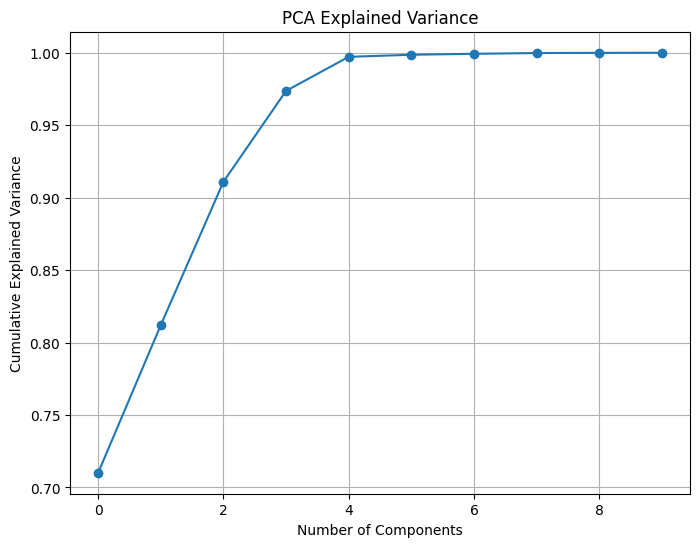

Creating rolling statistics...
Creating interaction terms...


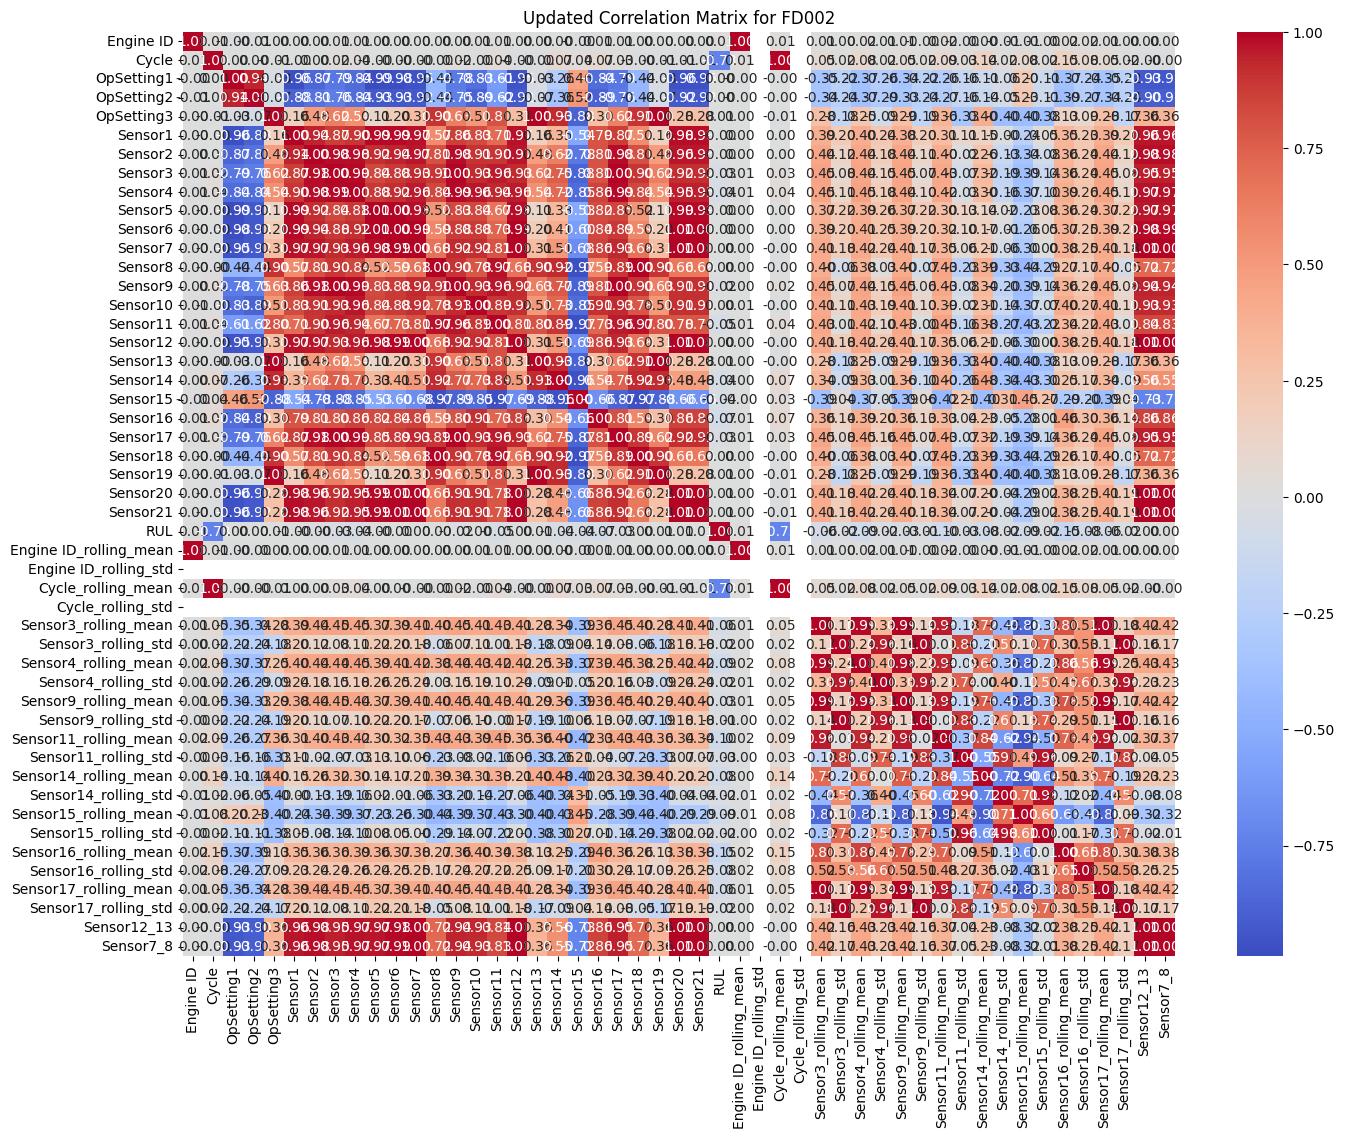

Saving processed data...
Processed data saved as 'processed_FD002.csv'


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load FD002 dataset
print("Loading FD002 dataset...")
train_fd002 = pd.read_csv('/content/train_FD002.txt', sep=" ", header=None)
train_fd002.dropna(axis=1, inplace=True)  # Remove any extra columns
train_fd002.columns = ['Engine ID', 'Cycle', 'OpSetting1', 'OpSetting2', 'OpSetting3'] + [f'Sensor{i}' for i in range(1, 22)]

# Add RUL column (assume RUL decreases linearly with Cycle)
print("Calculating RUL...")
train_fd002['Max Cycle'] = train_fd002.groupby('Engine ID')['Cycle'].transform('max')
train_fd002['RUL'] = train_fd002['Max Cycle'] - train_fd002['Cycle']
train_fd002.drop(columns=['Max Cycle'], inplace=True)

# Calculate correlations with RUL
correlations_with_rul = train_fd002.corr()['RUL']
print("Correlation of features with RUL:")
print(correlations_with_rul)

# Filter features based on correlation threshold
correlation_threshold = 0.01
important_features = correlations_with_rul[abs(correlations_with_rul) > correlation_threshold].index
filtered_data = train_fd002[important_features]

# Scale the filtered features
print("Scaling features...")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data.drop(columns=['RUL']))  # Exclude RUL for scaling
scaled_df = pd.DataFrame(scaled_data, columns=filtered_data.drop(columns=['RUL']).columns)

# Apply PCA for dimensionality reduction
print("Applying PCA...")
pca = PCA(n_components=10)  # Adjust the number of components as needed
pca_data = pca.fit_transform(scaled_df)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot PCA explained variance
plt.figure(figsize=(8, 6))
plt.plot(explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

# Reconstruct DataFrame with PCA components
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)
pca_df['RUL'] = train_fd002['RUL'].values

# Feature Engineering
print("Creating rolling statistics...")
for sensor in scaled_df.columns:
    train_fd002[f'{sensor}_rolling_mean'] = train_fd002.groupby('Engine ID')[sensor].rolling(window=5).mean().reset_index(level=0, drop=True)
    train_fd002[f'{sensor}_rolling_std'] = train_fd002.groupby('Engine ID')[sensor].rolling(window=5).std().reset_index(level=0, drop=True)

# Interaction Features
print("Creating interaction terms...")
train_fd002['Sensor12_13'] = train_fd002['Sensor12'] * train_fd002['Sensor13']
train_fd002['Sensor7_8'] = train_fd002['Sensor7'] * train_fd002['Sensor8']

# Updated Correlation Matrix
updated_correlation_matrix = train_fd002.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(updated_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Updated Correlation Matrix for FD002')
plt.show()

# Save filtered and processed data
print("Saving processed data...")
train_fd002.to_csv('processed_FD002.csv', index=False)
print("Processed data saved as 'processed_FD002.csv'")


Model Traning and Validation for F002


Loading FD002 dataset...
Calculating RUL...
Performing feature engineering...
Preparing data...
Scaling features...
Training Random Forest model...
Evaluating Random Forest model...
Random Forest Test RMSE: 31.32372515656685
Random Forest Test R^2: 0.6607462251488603


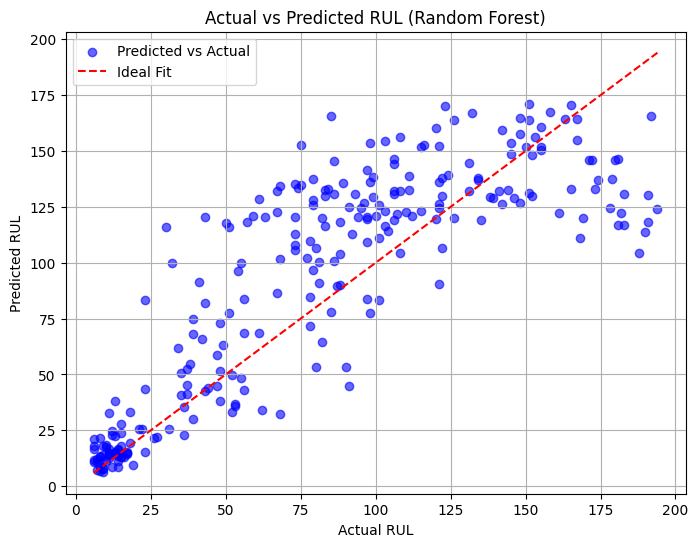

Results saved to 'rf_fd002_predictions.csv'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

# Load FD002 dataset
print("Loading FD002 dataset...")
train_data = pd.read_csv('/content/train_FD002.txt', sep="\s+", header=None)
test_data = pd.read_csv('/content/test_FD002.txt', sep="\s+", header=None)
rul_test = pd.read_csv('/content/RUL_FD002.txt', header=None)

# Assign column names based on dataset description
columns = ['Engine ID', 'Cycle'] + [f'OpSetting{i}' for i in range(1, 4)] + [f'Sensor{i}' for i in range(1, 22)]
train_data.columns = columns
test_data.columns = columns
rul_test.columns = ['RUL']

# Add RUL column to train data
print("Calculating RUL...")
train_data['Max Cycle'] = train_data.groupby('Engine ID')['Cycle'].transform('max')
train_data['RUL'] = train_data['Max Cycle'] - train_data['Cycle']
train_data.drop(columns=['Max Cycle'], inplace=True)

# Feature Engineering: Adding rolling statistics
print("Performing feature engineering...")
for dataset in [train_data, test_data]:
    for sensor in ['Sensor3', 'Sensor4', 'Sensor9', 'Sensor11', 'Sensor15']:
        dataset[f'{sensor}_rolling_mean'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).mean().reset_index(level=0, drop=True)
        dataset[f'{sensor}_rolling_std'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).std().reset_index(level=0, drop=True)
        dataset[f'{sensor}_diff'] = dataset.groupby('Engine ID')[sensor].diff()

# Drop unnecessary columns based on correlation analysis
drop_columns = ['Sensor1', 'Sensor5', 'Sensor10', 'Sensor16', 'Sensor18', 'Sensor19', 'OpSetting3']
train_data.drop(columns=drop_columns, inplace=True)
test_data.drop(columns=drop_columns, inplace=True)

# Prepare training and testing data
print("Preparing data...")
X_train = train_data.drop(columns=['RUL', 'Engine ID', 'Cycle'])
y_train = train_data['RUL']
X_test = test_data.groupby('Engine ID').last().reset_index().drop(columns=['Engine ID', 'Cycle'])
y_test = rul_test['RUL']

# Ensure feature consistency between train and test sets
features = X_train.columns
X_test = X_test[features]

# Scale features
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler and features for reproducibility
joblib.dump(scaler, 'scaler_fd002.pkl')
joblib.dump(features.tolist(), 'features_fd002.pkl')

# Train Random Forest model
print("Training Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Save the trained model
joblib.dump(rf_model, 'rf_model_fd002.pkl')

# Make predictions
print("Evaluating Random Forest model...")
y_pred = rf_model.predict(X_test_scaled)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Test RMSE: {rmse}")
print(f"Random Forest Test R^2: {r2}")

# Visualize Results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL (Random Forest)')
plt.legend()
plt.grid()
plt.show()

# Save results to CSV
results_df = pd.DataFrame({
    'Engine ID': test_data['Engine ID'].unique(),
    'Predicted RUL': np.round(y_pred),
    'Actual RUL': y_test
})
results_df.to_csv('rf_fd002_predictions.csv', index=False)
print("Results saved to 'rf_fd002_predictions.csv'.")


Loading FD002 dataset...
Calculating RUL...
Performing feature engineering...
Preparing data...
Scaling features...
Loading or training Random Forest model...
Training a new Random Forest model...
Saved new Random Forest model.
Making predictions...
Random Forest Test RMSE: 31.32372515656685
Random Forest Test R^2: 0.6607462251488603


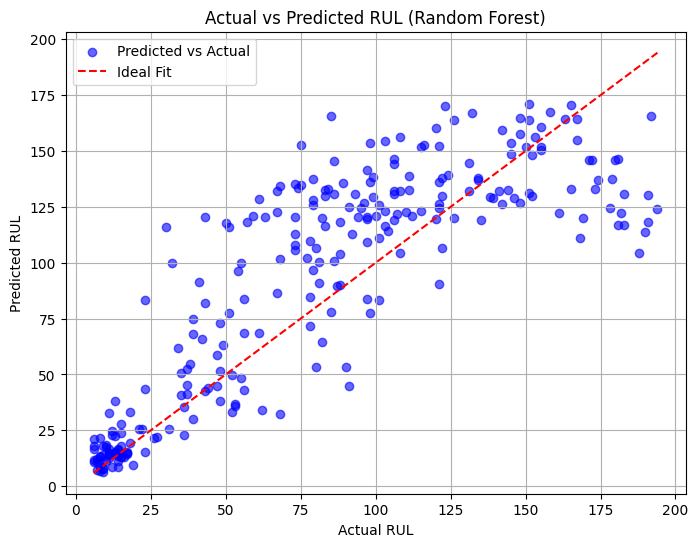

Results saved to 'rf_fd002_predictions.csv'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

# Load FD002 dataset
print("Loading FD002 dataset...")
train_data = pd.read_csv('/content/train_FD002.txt', sep="\s+", header=None)
test_data = pd.read_csv('/content/test_FD002.txt', sep="\s+", header=None)
rul_test = pd.read_csv('/content/RUL_FD002.txt', header=None)

# Assign column names based on dataset description
columns = ['Engine ID', 'Cycle'] + [f'OpSetting{i}' for i in range(1, 4)] + [f'Sensor{i}' for i in range(1, 22)]
train_data.columns = columns
test_data.columns = columns
rul_test.columns = ['RUL']

# Add RUL column to train data
print("Calculating RUL...")
train_data['Max Cycle'] = train_data.groupby('Engine ID')['Cycle'].transform('max')
train_data['RUL'] = train_data['Max Cycle'] - train_data['Cycle']
train_data.drop(columns=['Max Cycle'], inplace=True)

# Feature Engineering: Adding rolling statistics
print("Performing feature engineering...")
for dataset in [train_data, test_data]:
    for sensor in ['Sensor3', 'Sensor4', 'Sensor9', 'Sensor11', 'Sensor15']:
        dataset[f'{sensor}_rolling_mean'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).mean().reset_index(level=0, drop=True)
        dataset[f'{sensor}_rolling_std'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).std().reset_index(level=0, drop=True)
        dataset[f'{sensor}_diff'] = dataset.groupby('Engine ID')[sensor].diff()

# Drop unnecessary columns based on correlation analysis
drop_columns = ['Sensor1', 'Sensor5', 'Sensor10', 'Sensor16', 'Sensor18', 'Sensor19', 'OpSetting3']
train_data.drop(columns=drop_columns, inplace=True)
test_data.drop(columns=drop_columns, inplace=True)

# Prepare training and testing data
print("Preparing data...")
X_train = train_data.drop(columns=['RUL', 'Engine ID', 'Cycle'])
y_train = train_data['RUL']
X_test = test_data.groupby('Engine ID').last().reset_index().drop(columns=['Engine ID', 'Cycle'])
y_test = rul_test['RUL']

# Ensure feature consistency between train and test sets
features = X_train.columns
X_test = X_test[features]

# Scale features
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler and features for reproducibility
joblib.dump(scaler, 'scaler_fd002.pkl')
joblib.dump(features.tolist(), 'features_fd002.pkl')

# Load pre-trained Random Forest model or train a new one
print("Loading or training Random Forest model...")
rf_model_path = 'rf_model_fd002.pkl'
try:
    rf_model = joblib.load(rf_model_path)
    print("Loaded pre-trained Random Forest model.")
except FileNotFoundError:
    print("Training a new Random Forest model...")
    rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    joblib.dump(rf_model, rf_model_path)
    print("Saved new Random Forest model.")

# Make predictions
print("Making predictions...")
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Test RMSE: {rmse}")
print(f"Random Forest Test R^2: {r2}")

# Visualize Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL (Random Forest)')
plt.legend()
plt.grid()
plt.show()

# Save predictions to CSV
results_df = pd.DataFrame({
    'Engine ID': test_data['Engine ID'].unique(),
    'Predicted RUL': np.round(y_pred),
    'Actual RUL': y_test
})
results_df.to_csv('rf_fd002_predictions.csv', index=False)
print("Results saved to 'rf_fd002_predictions.csv'.")

Loading FD002 dataset...
Calculating RUL...
Performing feature engineering...
Preparing data...
Scaling features...
Loading or training Random Forest model...
Loaded pre-trained Random Forest model.
Making predictions...
Random Forest Test RMSE: 31.32372515656685
Random Forest Test R^2: 0.6607462251488603


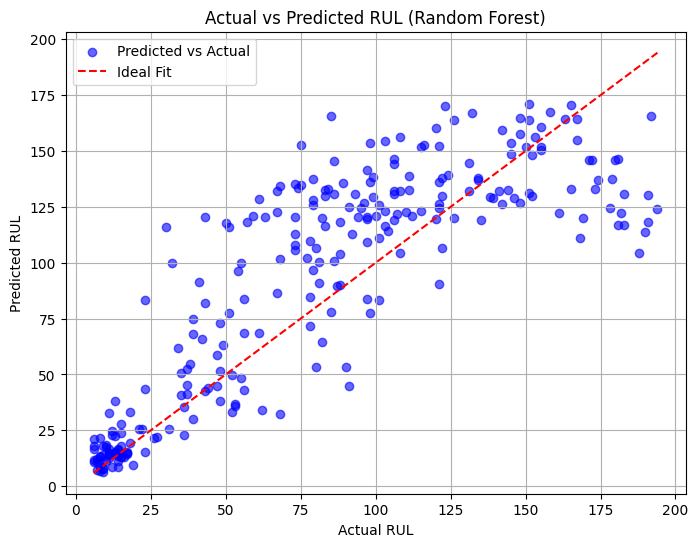


Predicted Class Distribution (Whole Numbers):
Predicted Classification
Healthy     69
Warning     27
Critical     3

Actual Class Distribution (Whole Numbers):
Actual Classification
Healthy     66
Warning     27
Critical     7
Results saved to 'rf_fd002_predictions_with_classifications.csv'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

# Load FD002 dataset
print("Loading FD002 dataset...")
train_data = pd.read_csv('/content/train_FD002.txt', sep="\s+", header=None)
test_data = pd.read_csv('/content/test_FD002.txt', sep="\s+", header=None)
rul_test = pd.read_csv('/content/RUL_FD002.txt', header=None)

# Assign column names based on dataset description
columns = ['Engine ID', 'Cycle'] + [f'OpSetting{i}' for i in range(1, 4)] + [f'Sensor{i}' for i in range(1, 22)]
train_data.columns = columns
test_data.columns = columns
rul_test.columns = ['RUL']

# Add RUL column to train data
print("Calculating RUL...")
train_data['Max Cycle'] = train_data.groupby('Engine ID')['Cycle'].transform('max')
train_data['RUL'] = train_data['Max Cycle'] - train_data['Cycle']
train_data.drop(columns=['Max Cycle'], inplace=True)

# Feature Engineering: Adding rolling statistics
print("Performing feature engineering...")
for dataset in [train_data, test_data]:
    for sensor in ['Sensor3', 'Sensor4', 'Sensor9', 'Sensor11', 'Sensor15']:
        dataset[f'{sensor}_rolling_mean'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).mean().reset_index(level=0, drop=True)
        dataset[f'{sensor}_rolling_std'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).std().reset_index(level=0, drop=True)
        dataset[f'{sensor}_diff'] = dataset.groupby('Engine ID')[sensor].diff()

# Drop unnecessary columns based on correlation analysis
drop_columns = ['Sensor1', 'Sensor5', 'Sensor10', 'Sensor16', 'Sensor18', 'Sensor19', 'OpSetting3']
train_data.drop(columns=drop_columns, inplace=True)
test_data.drop(columns=drop_columns, inplace=True)

# Prepare training and testing data
print("Preparing data...")
X_train = train_data.drop(columns=['RUL', 'Engine ID', 'Cycle'])
y_train = train_data['RUL']
X_test = test_data.groupby('Engine ID').last().reset_index().drop(columns=['Engine ID', 'Cycle'])
y_test = rul_test['RUL']

# Ensure feature consistency between train and test sets
features = X_train.columns
X_test = X_test[features]

# Scale features
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler and features for reproducibility
joblib.dump(scaler, 'scaler_fd002.pkl')
joblib.dump(features.tolist(), 'features_fd002.pkl')

# Load pre-trained Random Forest model or train a new one
print("Loading or training Random Forest model...")
rf_model_path = 'rf_model_fd002.pkl'
try:
    rf_model = joblib.load(rf_model_path)
    print("Loaded pre-trained Random Forest model.")
except FileNotFoundError:
    print("Training a new Random Forest model...")
    rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    joblib.dump(rf_model, rf_model_path)
    print("Saved new Random Forest model.")

# Make predictions
print("Making predictions...")
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Test RMSE: {rmse}")
print(f"Random Forest Test R^2: {r2}")

# Visualize Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL (Random Forest)')
plt.legend()
plt.grid()
plt.show()

# Define RUL Categories
def classify_rul(rul):
    if rul < 10:
        return "Critical"
    elif 10 <= rul <= 50:
        return "Warning"
    else:
        return "Healthy"

# Add Predictions and Classifications
results_df = pd.DataFrame({
    'Engine ID': test_data['Engine ID'].unique(),
    'Predicted RUL': np.round(y_pred),
    'Actual RUL': y_test
})

# Apply classification
results_df['Predicted Classification'] = results_df['Predicted RUL'].apply(classify_rul)
results_df['Actual Classification'] = results_df['Actual RUL'].apply(classify_rul)

# Display Class Distributions (Rounded to Whole Numbers)
predicted_class_distribution = results_df['Predicted Classification'].value_counts(normalize=True) * 100
actual_class_distribution = results_df['Actual Classification'].value_counts(normalize=True) * 100

# Round the percentages to whole numbers
predicted_class_distribution = predicted_class_distribution.round(0).astype(int)
actual_class_distribution = actual_class_distribution.round(0).astype(int)

print("\nPredicted Class Distribution (Whole Numbers):")
print(predicted_class_distribution.to_string())
print("\nActual Class Distribution (Whole Numbers):")
print(actual_class_distribution.to_string())

# Save predictions with classifications to CSV
results_df.to_csv('rf_fd002_predictions_with_classifications.csv', index=False)
print("Results saved to 'rf_fd002_predictions_with_classifications.csv'.")


Loading FD002 dataset...
Calculating RUL...
Performing feature engineering...
Preparing data...
Scaling features...
Loading or training XGBoost model...
Loaded pre-trained XGBoost model.
Making predictions...
XGBoost Test RMSE: 30.12679193348082
XGBoost Test R^2: 0.6861777901649475


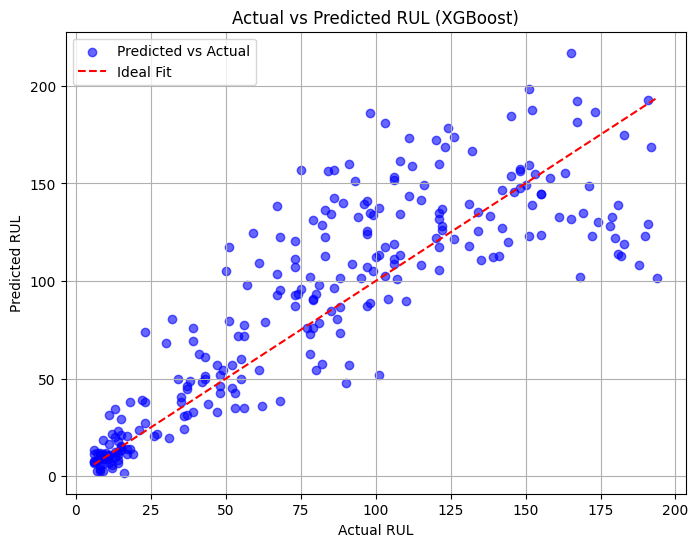


Predicted Class Distribution (Whole Numbers):
Predicted Classification
Healthy     68
Warning     25
Critical     8

Actual Class Distribution (Whole Numbers):
Actual Classification
Healthy     66
Warning     27
Critical     7
Results saved to 'xgb_fd002_predictions_with_classifications.csv'.


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

# Load FD002 dataset
print("Loading FD002 dataset...")
train_data = pd.read_csv('/content/train_FD002.txt', sep="\s+", header=None)
test_data = pd.read_csv('/content/test_FD002.txt', sep="\s+", header=None)
rul_test = pd.read_csv('/content/RUL_FD002.txt', header=None)

# Assign column names based on dataset description
columns = ['Engine ID', 'Cycle'] + [f'OpSetting{i}' for i in range(1, 4)] + [f'Sensor{i}' for i in range(1, 22)]
train_data.columns = columns
test_data.columns = columns
rul_test.columns = ['RUL']

# Add RUL column to train data
print("Calculating RUL...")
train_data['Max Cycle'] = train_data.groupby('Engine ID')['Cycle'].transform('max')
train_data['RUL'] = train_data['Max Cycle'] - train_data['Cycle']
train_data.drop(columns=['Max Cycle'], inplace=True)

# Feature Engineering: Adding rolling statistics
print("Performing feature engineering...")
for dataset in [train_data, test_data]:
    for sensor in ['Sensor3', 'Sensor4', 'Sensor9', 'Sensor11', 'Sensor15']:
        dataset[f'{sensor}_rolling_mean'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).mean().reset_index(level=0, drop=True)
        dataset[f'{sensor}_rolling_std'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).std().reset_index(level=0, drop=True)
        dataset[f'{sensor}_diff'] = dataset.groupby('Engine ID')[sensor].diff()

# Drop unnecessary columns based on correlation analysis
drop_columns = ['Sensor1', 'Sensor5', 'Sensor10', 'Sensor16', 'Sensor18', 'Sensor19', 'OpSetting3']
train_data.drop(columns=drop_columns, inplace=True)
test_data.drop(columns=drop_columns, inplace=True)

# Prepare training and testing data
print("Preparing data...")
X_train = train_data.drop(columns=['RUL', 'Engine ID', 'Cycle'])
y_train = train_data['RUL']
X_test = test_data.groupby('Engine ID').last().reset_index().drop(columns=['Engine ID', 'Cycle'])
y_test = rul_test['RUL']

# Ensure feature consistency between train and test sets
features = X_train.columns
X_test = X_test[features]

# Scale features
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler and features for reproducibility
joblib.dump(scaler, 'scaler_fd002.pkl')
joblib.dump(features.tolist(), 'features_fd002.pkl')

# Load pre-trained XGBoost model or train a new one
print("Loading or training XGBoost model...")
xgb_model_path = 'xgb_model_fd002.pkl'
try:
    xgb_model = joblib.load(xgb_model_path)
    print("Loaded pre-trained XGBoost model.")
except FileNotFoundError:
    print("Training a new XGBoost model...")
    xgb_model = XGBRegressor(
        objective='reg:squarederror',
        n_estimators=500,
        max_depth=10,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    xgb_model.fit(X_train_scaled, y_train)
    joblib.dump(xgb_model, xgb_model_path)
    print("Saved new XGBoost model.")

# Make predictions
print("Making predictions...")
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Test RMSE: {rmse}")
print(f"XGBoost Test R^2: {r2}")

# Visualize Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL (XGBoost)')
plt.legend()
plt.grid()
plt.show()

# Define RUL Categories
def classify_rul(rul):
    if rul < 10:
        return "Critical"
    elif 10 <= rul <= 50:
        return "Warning"
    else:
        return "Healthy"

# Add Predictions and Classifications
results_df = pd.DataFrame({
    'Engine ID': test_data['Engine ID'].unique(),
    'Predicted RUL': np.round(y_pred),
    'Actual RUL': y_test
})

results_df['Predicted Classification'] = results_df['Predicted RUL'].apply(classify_rul)
results_df['Actual Classification'] = results_df['Actual RUL'].apply(classify_rul)

# Display Class Distributions (Rounded to Whole Numbers)
predicted_class_distribution = results_df['Predicted Classification'].value_counts(normalize=True) * 100
actual_class_distribution = results_df['Actual Classification'].value_counts(normalize=True) * 100

# Round the percentages to the nearest whole number
predicted_class_distribution = predicted_class_distribution.round(0).astype(int)
actual_class_distribution = actual_class_distribution.round(0).astype(int)

print("\nPredicted Class Distribution (Whole Numbers):")
print(predicted_class_distribution.to_string())
print("\nActual Class Distribution (Whole Numbers):")
print(actual_class_distribution.to_string())


# Save predictions with classifications to CSV
results_df.to_csv('xgb_fd002_predictions_with_classifications.csv', index=False)
print("Results saved to 'xgb_fd002_predictions_with_classifications.csv'.")


Loading datasets...
Performing feature engineering...
Calculating RUL...
Scaling features...
Training base models...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7561
[LightGBM] [Info] Number of data points in the train set: 53759, number of used features: 32
[LightGBM] [Info] Start training from score 108.154746
Optimizing blending weights...
Optimized Weights: [0.33496649 0.19142058 0.47361293]
Blended Ensemble Test RMSE: 29.54729211014896
Blended Ensemble Test R^2: 0.69813465978246


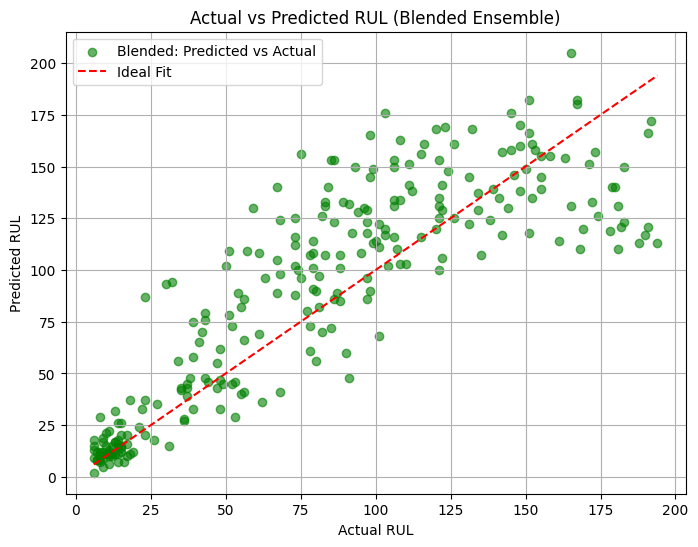


Percentage Distribution of Predicted Classifications (Rounded):
Predicted Classification
Healthy     68
Warning     28
Critical     4

Percentage Distribution of Actual Classifications (Rounded):
Actual Classification
Healthy     66
Warning     27
Critical     7
Results with classifications saved to 'blended_ensemble_predicted_vs_actual_rul_fd002_with_classifications.csv'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import joblib

# Load FD002 dataset
print("Loading datasets...")
train_data = pd.read_csv('/content/train_FD002.txt', sep='\s+', header=None)
test_data = pd.read_csv('/content/test_FD002.txt', sep='\s+', header=None)
rul_test = pd.read_csv('/content/RUL_FD002.txt', header=None)

# Assign column names
columns = ['Engine ID', 'Cycle'] + [f'OpSetting{i}' for i in range(1, 4)] + [f'Sensor{i}' for i in range(1, 22)]
train_data.columns = columns
test_data.columns = columns
rul_test.columns = ['RUL']

# Feature Engineering
print("Performing feature engineering...")
for dataset in [train_data, test_data]:
    for sensor in ['Sensor3', 'Sensor4', 'Sensor9', 'Sensor11', 'Sensor15']:
        dataset[f'{sensor}_rolling_mean'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).mean().reset_index(level=0, drop=True)
        dataset[f'{sensor}_rolling_std'] = dataset.groupby('Engine ID')[sensor].rolling(window=5).std().reset_index(level=0, drop=True)
        dataset[f'{sensor}_diff'] = dataset.groupby('Engine ID')[sensor].diff()

# Drop unnecessary columns based on correlation analysis
drop_columns = ['Sensor1', 'Sensor5', 'Sensor10', 'Sensor16', 'Sensor18', 'Sensor19', 'OpSetting3']
train_data.drop(columns=drop_columns, inplace=True)
test_data.drop(columns=drop_columns, inplace=True)

# Add RUL column to train data
print("Calculating RUL...")
train_data['Max Cycle'] = train_data.groupby('Engine ID')['Cycle'].transform('max')
train_data['RUL'] = train_data['Max Cycle'] - train_data['Cycle']
train_data.drop(columns=['Max Cycle'], inplace=True)

# Prepare training and test data
X_train = train_data.drop(columns=['RUL', 'Engine ID', 'Cycle'])
y_train = train_data['RUL']
X_test = test_data.groupby('Engine ID').last().reset_index().drop(columns=['Engine ID', 'Cycle'])
y_test = rul_test['RUL']

# Ensure feature consistency between train and test
features = X_train.columns
X_test = X_test[features]

# Scale features
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler and features
joblib.dump(scaler, 'scaler_fd002.pkl')
joblib.dump(features.tolist(), 'features_fd002.pkl')

# Train Base Models
print("Training base models...")

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.8)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# LightGBM
lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42, n_estimators=200, max_depth=7, learning_rate=0.1, subsample=0.8)
lgb_model.fit(X_train_scaled, y_train)
lgb_pred = lgb_model.predict(X_test_scaled)

# Blending: Optimize Weights
print("Optimizing blending weights...")

def objective(weights):
    blended_pred = weights[0] * xgb_pred + weights[1] * rf_pred + weights[2] * lgb_pred
    return np.sqrt(mean_squared_error(y_test, blended_pred))

constraints = [{'type': 'eq', 'fun': lambda weights: 1 - sum(weights)}]
bounds = [(0, 1)] * 3
initial_weights = [1/3, 1/3, 1/3]

result = minimize(objective, initial_weights, bounds=bounds, constraints=constraints)
optimized_weights = result.x
print(f"Optimized Weights: {optimized_weights}")

# Final Blended Prediction
blended_pred = optimized_weights[0] * xgb_pred + optimized_weights[1] * rf_pred + optimized_weights[2] * lgb_pred
blended_pred = np.round(blended_pred)  # Round predictions to whole numbers

# Evaluate the final blended model
blended_rmse = np.sqrt(mean_squared_error(y_test, blended_pred))
blended_r2 = r2_score(y_test, blended_pred)

print(f"Blended Ensemble Test RMSE: {blended_rmse}")
print(f"Blended Ensemble Test R^2: {blended_r2}")

# Visualize Results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, blended_pred, color='green', label='Blended: Predicted vs Actual', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL (Blended Ensemble)')
plt.legend()
plt.grid()
plt.show()

# Save predictions to DataFrame
results_df = pd.DataFrame({'Engine ID': test_data['Engine ID'].unique(),
                           'Blended Predicted RUL': blended_pred,
                           'Actual RUL': y_test})

# Define RUL Categories
def classify_rul(rul):
    if rul < 10:
        return "Critical"
    elif 10 <= rul <= 50:
        return "Warning"
    else:
        return "Healthy"

# Add Classifications
results_df['Predicted Classification'] = results_df['Blended Predicted RUL'].apply(classify_rul)
results_df['Actual Classification'] = results_df['Actual RUL'].apply(classify_rul)

# Display Percentage Distribution of Classes
predicted_class_distribution = results_df['Predicted Classification'].value_counts(normalize=True) * 100
actual_class_distribution = results_df['Actual Classification'].value_counts(normalize=True) * 100

# Round the percentages to the nearest whole number
predicted_class_distribution = predicted_class_distribution.round(0).astype(int)
actual_class_distribution = actual_class_distribution.round(0).astype(int)

print("\nPercentage Distribution of Predicted Classifications (Rounded):")
print(predicted_class_distribution.to_string())
print("\nPercentage Distribution of Actual Classifications (Rounded):")
print(actual_class_distribution.to_string())

# Save Results with Classifications
results_df.to_csv('blended_ensemble_predicted_vs_actual_rul_fd002_with_classifications.csv', index=False)
print("Results with classifications saved to 'blended_ensemble_predicted_vs_actual_rul_fd002_with_classifications.csv'.")
